In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
#visualisation libraries
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins
from sklearn.model_selection import TimeSeriesSplit
import warnings
warnings.simplefilter("ignore")
from prophet import Prophet

In [2]:
dataCombined=pd.read_csv("allDataCombined.csv" ,encoding='unicode_escape')

In [3]:
dataCombined.head(5)

country  iso      date  population  popPerSqKm  meanAge urbanPop%  \
0  Afghanistan  AFG  2020/1/1    38928346          60       18       25%   
1  Afghanistan  AFG  2020/1/2    38928346          60       18       25%   
2  Afghanistan  AFG  2020/1/3    38928346          60       18       25%   
3  Afghanistan  AFG  2020/1/4    38928346          60       18       25%   
4  Afghanistan  AFG  2020/1/5    38928346          60       18       25%   

  worldPop% testUnit  #dailyTests  ...  H2TestingPolicy  H3ContactTracing  \
0     0.50%      NaN          NaN  ...              0.0               0.0   
1     0.50%      NaN          NaN  ...              0.0               0.0   
2     0.50%      NaN          NaN  ...              0.0               0.0   
3     0.50%      NaN          NaN  ...              0.0               0.0   
4     0.50%      NaN          NaN  ...              0.0               0.0   

   H4EmergencyInvestmentInHealthcare  H5InvestmentInVaccines  \
0                                0.0                     0.0   
1                                0.0                     0.0   
2                                0.0                     0.0   
3                                0.0                     0.0   
4                                0.0                     0.0   

   H6FacialCoverings  H6Flag  H7VaccinationPolicy H7Flag  \
0                0.0     NaN                  0.0    NaN   
1                0.0     NaN                  0.0    NaN   
2                0.0     NaN                  0.0    NaN   
3                0.0     NaN                  0.0    NaN   
4                0.0     NaN                  0.0    NaN   

  H8ProtectionOfElderlyPeople H8Flag  
0                         0.0    NaN  
1                         0.0    NaN  
2                         0.0    NaN  
3                         0.0    NaN  
4                         0.0    NaN  

[5 rows x 97 columns]

In [4]:
#clean data
df=dataCombined.drop(columns=["iso","popPerSqKm","urbanPop%","worldPop%","testUnit","#dailyTestsPerThousand","#testsTotalPerThousand"])
df

country       date  population  meanAge  #dailyTests  #testsTotal  \
0       Afghanistan   2020/1/1    38928346       18          NaN          NaN   
1       Afghanistan   2020/1/2    38928346       18          NaN          NaN   
2       Afghanistan   2020/1/3    38928346       18          NaN          NaN   
3       Afghanistan   2020/1/4    38928346       18          NaN          NaN   
4       Afghanistan   2020/1/5    38928346       18          NaN          NaN   
...             ...        ...         ...      ...          ...          ...   
135106     Zimbabwe  2021/9/24    14862924       19          NaN          NaN   
135107     Zimbabwe  2021/9/25    14862924       19          NaN          NaN   
135108     Zimbabwe  2021/9/26    14862924       19          NaN          NaN   
135109     Zimbabwe  2021/9/27    14862924       19          NaN          NaN   
135110     Zimbabwe  2021/9/28    14862924       19          NaN          NaN   

        #tests7daySmooth  #tests7daySmoothPerThousand  positiveRate  \
0                    NaN                          NaN           NaN   
1                    NaN                          NaN           NaN   
2                    NaN                          NaN           NaN   
3                    NaN                          NaN           NaN   
4                    NaN                          NaN           NaN   
...                  ...                          ...           ...   
135106               NaN                          NaN           NaN   
135107               NaN                          NaN           NaN   
135108               NaN                          NaN           NaN   
135109               NaN                          NaN           NaN   
135110               NaN                          NaN           NaN   

        positiveRatePerCase  ... H2TestingPolicy H3ContactTracing  \
0                       NaN  ...             0.0              0.0   
1                       NaN  ...             0.0              0.0   
2                       NaN  ...             0.0              0.0   
3                       NaN  ...             0.0              0.0   
4                       NaN  ...             0.0              0.0   
...                     ...  ...             ...              ...   
135106                  NaN  ...             NaN              NaN   
135107                  NaN  ...             NaN              NaN   
135108                  NaN  ...             NaN              NaN   
135109                  NaN  ...             NaN              NaN   
135110                  NaN  ...             NaN              NaN   

       H4EmergencyInvestmentInHealthcare  H5InvestmentInVaccines  \
0                                    0.0                     0.0   
1                                    0.0                     0.0   
2                                    0.0                     0.0   
3                                    0.0                     0.0   
4                                    0.0                     0.0   
...                                  ...                     ...   
135106                               NaN                     NaN   
135107                               NaN                     NaN   
135108                               NaN                     NaN   
135109                               NaN                     NaN   
135110                               NaN                     NaN   

        H6FacialCoverings  H6Flag  H7VaccinationPolicy  H7Flag  \
0                     0.0     NaN                  0.0     NaN   
1                     0.0     NaN                  0.0     NaN   
2                     0.0     NaN                  0.0     NaN   
3                     0.0     NaN                  0.0     NaN   
4                     0.0     NaN                  0.0     NaN   
...                   ...     ...                  ...     ...   
135106                NaN     NaN                  NaN     NaN   
135107      

In [5]:
#只提取有用的列 select useful columns
df=pd.DataFrame(df,columns=["country","date","population","#dailyTests","#testsTotal","positiveRate","#sequencesTotal","%alpha","%B.1.1.277","%B.1.1.302","%B.1.1.519","%B.1.160","%B.1.177","%B.1.221","%B.1.258","%B.1.367","%B.1.620","%beta","%delta","%epsilon","%eta","%gamma","%iota","%kappa","%lambda","%mu","%S:677H.Robin1","%S:677P.Pelican","%other","#dailyVaccinations","#fullyVaccinated","#confirmedCases","#confirmedDeaths"])
df

country       date  population  #dailyTests  #testsTotal  \
0       Afghanistan   2020/1/1    38928346          NaN          NaN   
1       Afghanistan   2020/1/2    38928346          NaN          NaN   
2       Afghanistan   2020/1/3    38928346          NaN          NaN   
3       Afghanistan   2020/1/4    38928346          NaN          NaN   
4       Afghanistan   2020/1/5    38928346          NaN          NaN   
...             ...        ...         ...          ...          ...   
135106     Zimbabwe  2021/9/24    14862924          NaN          NaN   
135107     Zimbabwe  2021/9/25    14862924          NaN          NaN   
135108     Zimbabwe  2021/9/26    14862924          NaN          NaN   
135109     Zimbabwe  2021/9/27    14862924          NaN          NaN   
135110     Zimbabwe  2021/9/28    14862924          NaN          NaN   

        positiveRate  #sequencesTotal  %alpha  %B.1.1.277  %B.1.1.302  ...  \
0                NaN              NaN     NaN         NaN         NaN  ...   
1                NaN              NaN     NaN         NaN         NaN  ...   
2                NaN              NaN     NaN         NaN         NaN  ...   
3                NaN              NaN     NaN         NaN         NaN  ...   
4                NaN              NaN     NaN         NaN         NaN  ...   
...              ...              ...     ...         ...         ...  ...   
135106           NaN              NaN     NaN         NaN         NaN  ...   
135107           NaN              NaN     NaN         NaN         NaN  ...   
135108           NaN              NaN     NaN         NaN         NaN  ...   
135109           NaN              NaN     NaN         NaN         NaN  ...   
135110           NaN              NaN     NaN         NaN         NaN  ...   

        %kappa  %lambda  %mu  %S:677H.Robin1  %S:677P.Pelican  %other  \
0          NaN      NaN  NaN             NaN              NaN     NaN   
1          NaN      NaN  NaN             NaN              NaN     NaN   
2          NaN      NaN  NaN             NaN              NaN     NaN   
3          NaN      NaN  NaN             NaN              NaN     NaN   
4          NaN      NaN  NaN             NaN              NaN     NaN   
...        ...      ...  ...             ...              ...     ...   
135106     NaN      NaN  NaN             NaN              NaN     NaN   
135107     NaN      NaN  NaN             NaN              NaN     NaN   
135108     NaN      NaN  NaN             NaN              NaN     NaN   
135109     NaN      NaN  NaN             NaN              NaN     NaN   
135110     NaN      NaN  NaN             NaN              NaN     NaN   

        #dailyVaccinations  #fullyVaccinated  #confirmedCases  \
0                      NaN               NaN              NaN   
1                      NaN               NaN              NaN   
2                      NaN               NaN              NaN   
3                      NaN               NaN              NaN   
4                      NaN               NaN              NaN   
...                    ...               ...              ...   
135106                 NaN               NaN         129134.0   
135107                 NaN               NaN         129505.0   
135108                 NaN               NaN         129625.0   
135109                 NaN               NaN         129919.0   
135110                 NaN               NaN              NaN   

        #confirmedDeaths  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
...                  ...  
135106            4600.0  
135107            4603.0  
135108            4604.0  
135109            4607.0  
135110               NaN  

[135111 rows x 33 columns]

In [6]:
#change the name of some festure
df.rename(columns={"#dailyTests":"dailyTests","#testsTotal":"testsTotal","#sequencesTotal":"sequencesTotal","%alpha":"alpha","%B.1.1.277":"B.1.1.277","%B.1.1.302":"B.1.1.302","%B.1.1.519":"B.1.1.519","%B.1.160":"B.1.160","%B.1.177":"B.1.177","%B.1.221":"B.1.221","%B.1.258":"B.1.258","%B.1.367":"B.1.367","%B.1.620":"B.1.620","%beta":"beta","%delta":"delta","%epsilon":"epsilon","%eta":"eta","%gamma":"gamma","%iota":"iota","%kappa":"kappa","%lambda":"lambda","%mu":"mu","%S:677H.Robin1":"S:677H.Robin1","%S:677P.Pelican":"S:677P.Pelican","%other":"other","#dailyVaccinations":"dailyVaccinations","#fullyVaccinated":"fullyVaccinated","#confirmedCases":"confirmedCases","#confirmedDeaths":"confirmedDeaths"},inplace=True)
df

country       date  population  dailyTests  testsTotal  \
0       Afghanistan   2020/1/1    38928346         NaN         NaN   
1       Afghanistan   2020/1/2    38928346         NaN         NaN   
2       Afghanistan   2020/1/3    38928346         NaN         NaN   
3       Afghanistan   2020/1/4    38928346         NaN         NaN   
4       Afghanistan   2020/1/5    38928346         NaN         NaN   
...             ...        ...         ...         ...         ...   
135106     Zimbabwe  2021/9/24    14862924         NaN         NaN   
135107     Zimbabwe  2021/9/25    14862924         NaN         NaN   
135108     Zimbabwe  2021/9/26    14862924         NaN         NaN   
135109     Zimbabwe  2021/9/27    14862924         NaN         NaN   
135110     Zimbabwe  2021/9/28    14862924         NaN         NaN   

        positiveRate  sequencesTotal  alpha  B.1.1.277  B.1.1.302  ...  kappa  \
0                NaN             NaN    NaN        NaN        NaN  ...    NaN   
1                NaN             NaN    NaN        NaN        NaN  ...    NaN   
2                NaN             NaN    NaN        NaN        NaN  ...    NaN   
3                NaN             NaN    NaN        NaN        NaN  ...    NaN   
4                NaN             NaN    NaN        NaN        NaN  ...    NaN   
...              ...             ...    ...        ...        ...  ...    ...   
135106           NaN             NaN    NaN        NaN        NaN  ...    NaN   
135107           NaN             NaN    NaN        NaN        NaN  ...    NaN   
135108           NaN             NaN    NaN        NaN        NaN  ...    NaN   
135109           NaN             NaN    NaN        NaN        NaN  ...    NaN   
135110           NaN             NaN    NaN        NaN        NaN  ...    NaN   

        lambda  mu  S:677H.Robin1  S:677P.Pelican  other  dailyVaccinations  \
0          NaN NaN            NaN             NaN    NaN                NaN   
1          NaN NaN            NaN             NaN    NaN                NaN   
2          NaN NaN            NaN             NaN    NaN                NaN   
3          NaN NaN            NaN             NaN    NaN                NaN   
4          NaN NaN            NaN             NaN    NaN                NaN   
...        ...  ..            ...             ...    ...                ...   
135106     NaN NaN            NaN             NaN    NaN                NaN   
135107     NaN NaN            NaN             NaN    NaN                NaN   
135108     NaN NaN            NaN             NaN    NaN                NaN   
135109     NaN NaN            NaN             NaN    NaN                NaN   
135110     NaN NaN            NaN             NaN    NaN                NaN   

        fullyVaccinated  confirmedCases  confirmedDeaths  
0                   NaN             NaN              NaN  
1                   NaN             NaN              NaN  
2                   NaN             NaN              NaN  
3                   NaN             NaN              NaN  
4                   NaN             NaN              NaN  
...                 ...             ...              ...  
135106              NaN        129134.0           4600.0  
135107              NaN        129505.0           4603.0  
135108              NaN        129625.0           4604.0  
135109              NaN        129919.0           4607.0  
135110              NaN             NaN              NaN  

[135111 rows x 33 columns]

In [7]:
df.columns

Index(['country', 'date', 'population', 'dailyTests', 'testsTotal',
       'positiveRate', 'sequencesTotal', 'alpha', 'B.1.1.277', 'B.1.1.302',
       'B.1.1.519', 'B.1.160', 'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367',
       'B.1.620', 'beta', 'delta', 'epsilon', 'eta', 'gamma', 'iota', 'kappa',
       'lambda', 'mu', 'S:677H.Robin1', 'S:677P.Pelican', 'other',
       'dailyVaccinations', 'fullyVaccinated', 'confirmedCases',
       'confirmedDeaths'],
      dtype='object')

In [8]:
#check all countries list
print(df['country'].unique())
print(df['country'].nunique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 'Croatia' 'Cuba' 'Cura_ao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Faeroe Islands'
 'Falkland Islands' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland'
 'Grenada' 'Guam' 'Guatemala' 'Guernsey' 'Guinea' 'Guinea-B

In [9]:
# convert data from object to datetime
df["date"] = pd.to_datetime(df["date"])
df

country       date  population  dailyTests  testsTotal  \
0       Afghanistan 2020-01-01    38928346         NaN         NaN   
1       Afghanistan 2020-01-02    38928346         NaN         NaN   
2       Afghanistan 2020-01-03    38928346         NaN         NaN   
3       Afghanistan 2020-01-04    38928346         NaN         NaN   
4       Afghanistan 2020-01-05    38928346         NaN         NaN   
...             ...        ...         ...         ...         ...   
135106     Zimbabwe 2021-09-24    14862924         NaN         NaN   
135107     Zimbabwe 2021-09-25    14862924         NaN         NaN   
135108     Zimbabwe 2021-09-26    14862924         NaN         NaN   
135109     Zimbabwe 2021-09-27    14862924         NaN         NaN   
135110     Zimbabwe 2021-09-28    14862924         NaN         NaN   

        positiveRate  sequencesTotal  alpha  B.1.1.277  B.1.1.302  ...  kappa  \
0                NaN             NaN    NaN        NaN        NaN  ...    NaN   
1                NaN             NaN    NaN        NaN        NaN  ...    NaN   
2                NaN             NaN    NaN        NaN        NaN  ...    NaN   
3                NaN             NaN    NaN        NaN        NaN  ...    NaN   
4                NaN             NaN    NaN        NaN        NaN  ...    NaN   
...              ...             ...    ...        ...        ...  ...    ...   
135106           NaN             NaN    NaN        NaN        NaN  ...    NaN   
135107           NaN             NaN    NaN        NaN        NaN  ...    NaN   
135108           NaN             NaN    NaN        NaN        NaN  ...    NaN   
135109           NaN             NaN    NaN        NaN        NaN  ...    NaN   
135110           NaN             NaN    NaN        NaN        NaN  ...    NaN   

        lambda  mu  S:677H.Robin1  S:677P.Pelican  other  dailyVaccinations  \
0          NaN NaN            NaN             NaN    NaN                NaN   
1          NaN NaN            NaN             NaN    NaN                NaN   
2          NaN NaN            NaN             NaN    NaN                NaN   
3          NaN NaN            NaN             NaN    NaN                NaN   
4          NaN NaN            NaN             NaN    NaN                NaN   
...        ...  ..            ...             ...    ...                ...   
135106     NaN NaN            NaN             NaN    NaN                NaN   
135107     NaN NaN            NaN             NaN    NaN                NaN   
135108     NaN NaN            NaN             NaN    NaN                NaN   
135109     NaN NaN            NaN             NaN    NaN                NaN   
135110     NaN NaN            NaN             NaN    NaN                NaN   

        fullyVaccinated  confirmedCases  confirmedDeaths  
0                   NaN             NaN              NaN  
1                   NaN             NaN              NaN  
2                   NaN             NaN              NaN  
3                   NaN             NaN              NaN  
4                   NaN             NaN              NaN  
...                 ...             ...              ...  
135106              NaN        129134.0           4600.0  
135107              NaN        129505.0           4603.0  
135108              NaN        129625.0           4604.0  
135109              NaN        129919.0           4607.0  
135110              NaN             NaN              NaN  

[135111 rows x 33 columns]

In [10]:
df.to_csv("dataset_afterrename.csv")

In [11]:
#visualising world covid cases
confirmedCases=df.groupby("date").sum()["confirmedCases"].reset_index()
confirmedDeaths=df.groupby("date").sum()["confirmedDeaths"].reset_index()

In [12]:
confirmedCases

date  confirmedCases
0   2020-01-01             0.0
1   2020-01-02             0.0
2   2020-01-03             0.0
3   2020-01-04             0.0
4   2020-01-05             0.0
..         ...             ...
632 2021-09-24     230336702.0
633 2021-09-25     230697743.0
634 2021-09-26     231026535.0
635 2021-09-27     231512677.0
636 2021-09-28             0.0

[637 rows x 2 columns]

In [13]:
fig=go.Figure()
#ploting datwise confirmed cases
fig.add_trace(go.Scatter(x=confirmedCases["date"],y=confirmedCases["confirmedCases"],mode="lines+markers",name="confirmedCases",line=dict(color="blue")))
fig.add_trace(go.Scatter(x=confirmedDeaths["date"],y=confirmedDeaths["confirmedDeaths"],mode="lines+markers",name="confirmedDeaths",line=dict(color="red")))

fig.update_layout(title="Worldwide Covid-19 Cases",xaxis_tickfont_size=14,yaxis=dict(title="Number of cases"))
fig.show()

In [14]:
#why 2021.2.15,the number of confirmedcases are descresed?(because here is a special point) 
#In 2021.2.12,the main body which response for researching covid used a new method to count pacient about effected for covid19, but after one they realized that isn´t the right method to count the pacient,so they changed back the method before.so thats why the path is smooth but in 2021.2.15 the number of confirmed is down.

In [15]:
#Forecasting total number of the worldwide cases.(prophet)--Data preparing


In [16]:
confirmedCases=df.groupby("date").sum()["confirmedCases"].reset_index()
confirmedDeaths=df.groupby("date").sum()["confirmedDeaths"].reset_index()
confirmedCases


date  confirmedCases
0   2020-01-01             0.0
1   2020-01-02             0.0
2   2020-01-03             0.0
3   2020-01-04             0.0
4   2020-01-05             0.0
..         ...             ...
632 2021-09-24     230336702.0
633 2021-09-25     230697743.0
634 2021-09-26     231026535.0
635 2021-09-27     231512677.0
636 2021-09-28             0.0

[637 rows x 2 columns]

In [17]:
confirmedDeaths

date  confirmedDeaths
0   2020-01-01              0.0
1   2020-01-02              0.0
2   2020-01-03              0.0
3   2020-01-04              0.0
4   2020-01-05              0.0
..         ...              ...
632 2021-09-24        4723240.0
633 2021-09-25        4728473.0
634 2021-09-26        4733555.0
635 2021-09-27        4741578.0
636 2021-09-28              0.0

[637 rows x 2 columns]

In [18]:
confirmedCases["date"]=pd.to_datetime(confirmedCases["date"])
confirmedDeaths["date"]=pd.to_datetime(confirmedDeaths["date"])

In [19]:
confirmedCases.columns=["ds","y"]
#confirmedCases["ds"]=confirmedCases["ds"].dt.date
confirmedCases["ds"]=pd.to_datetime(confirmedCases["ds"])
confirmedCases

ds            y
0   2020-01-01          0.0
1   2020-01-02          0.0
2   2020-01-03          0.0
3   2020-01-04          0.0
4   2020-01-05          0.0
..         ...          ...
632 2021-09-24  230336702.0
633 2021-09-25  230697743.0
634 2021-09-26  231026535.0
635 2021-09-27  231512677.0
636 2021-09-28          0.0

[637 rows x 2 columns]

In [20]:
confirmedCases.tail()

ds            y
632 2021-09-24  230336702.0
633 2021-09-25  230697743.0
634 2021-09-26  231026535.0
635 2021-09-27  231512677.0
636 2021-09-28          0.0

In [21]:
confirmedDeaths.columns=["ds","y"]
#confirmedDeaths["ds"]=confirmedDeaths["ds"].dt.date
confirmedDeaths["ds"]=pd.to_datetime(confirmedDeaths["ds"])
confirmedDeaths

ds          y
0   2020-01-01        0.0
1   2020-01-02        0.0
2   2020-01-03        0.0
3   2020-01-04        0.0
4   2020-01-05        0.0
..         ...        ...
632 2021-09-24  4723240.0
633 2021-09-25  4728473.0
634 2021-09-26  4733555.0
635 2021-09-27  4741578.0
636 2021-09-28        0.0

[637 rows x 2 columns]

In [22]:
#Forecasting confirmed NCovid-19 cases worldwide with Prophet(base model)
#generating two weeks ahead forecast of confirmed cases of NCovid-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors
#使用 Prophet 生成对 NCovid-19 确诊病例的提前一周预测，通过创建基本模型而不调整与季节性相关的参数和额外的回归量，预测间隔为 95%.

In [23]:
model=Prophet(interval_width=0.95)#0.95 is confidence interval of statistics. actually means still has 5% error.
model.fit(confirmedCases)
future=model.make_future_dataframe(periods=7)
future.tail()

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
639 2021-10-01
640 2021-10-02
641 2021-10-03
642 2021-10-04
643 2021-10-05

In [24]:
#here said INFO for prophet is YES, cuz covid-19 dont have seasonality .
#the Predict method will assign each row in future a predicted value which it names yhat. if you pas in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a colums yhat with the forecst, as well as columns for conponents and uncertainty intervals.
#Predict 方法将在未来为每一行分配一个预测值，它命名为 yhat。 如果您输入历史日期，它将提供样本内拟合。 这里的预测对象是一个新的数据框，其中包括一个带有预测的列 yhat，以及用于分量和不确定性区间的列。

In [25]:
#predicting the future with date, and upper and lower limit of y value. 这里设置上限和下限为了容差
forecast=model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

ds          yhat    yhat_lower    yhat_upper
639 2021-10-01  2.428151e+08  1.952039e+08  2.872202e+08
640 2021-10-02  2.264032e+08  1.785049e+08  2.739380e+08
641 2021-10-03  2.251660e+08  1.771098e+08  2.725505e+08
642 2021-10-04  2.217092e+08  1.745531e+08  2.715152e+08
643 2021-10-05  2.204697e+08  1.755207e+08  2.694531e+08

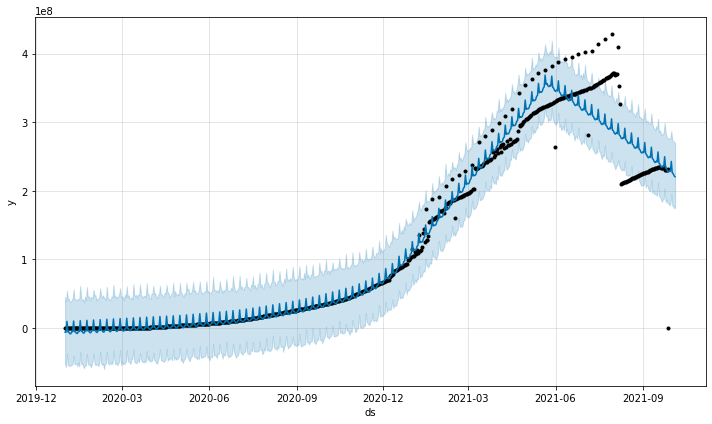

In [26]:
#we can plot the forecast by calling the Prophet.plot method and passing in our dataframe
confirmedCases_forecast_plot=model.plot(forecast)
#黑点是原始值， 蓝色的线是预测值，我们可以发现容差较低，我们可以看到从2019年12月--2021年6月，略有偏差，但是都在容差之内，但是从2021年6月开始出现转折，也许是因为随着疫苗的接种，对新冠病毒有影响。

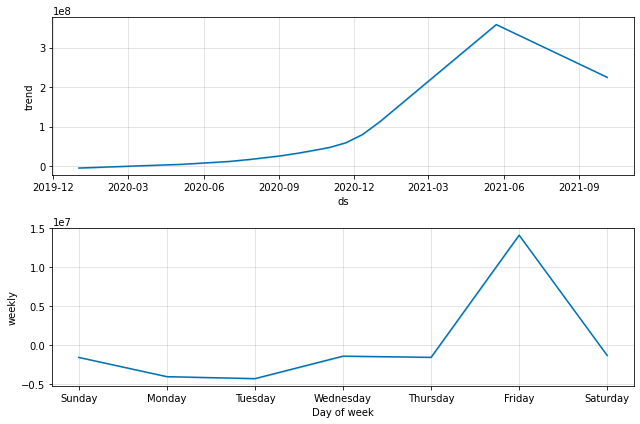

In [27]:
#with the components we could see more detail en each day.
confirmed_forecast_plot=model.plot_components(forecast)

In [28]:
#if we want to prefict two weeks
model=Prophet(interval_width=0.95)#0.95 is confidence interval of statistics. actually means still has 5% error.
model.fit(confirmedCases)
future=model.make_future_dataframe(periods=14)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
646 2021-10-08
647 2021-10-09
648 2021-10-10
649 2021-10-11
650 2021-10-12

In [29]:
forecast=model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

ds          yhat    yhat_lower    yhat_upper
646 2021-10-08  2.359053e+08  1.898131e+08  2.836870e+08
647 2021-10-09  2.194934e+08  1.711703e+08  2.662268e+08
648 2021-10-10  2.182562e+08  1.685056e+08  2.676352e+08
649 2021-10-11  2.147994e+08  1.651920e+08  2.604782e+08
650 2021-10-12  2.135599e+08  1.654916e+08  2.602825e+08

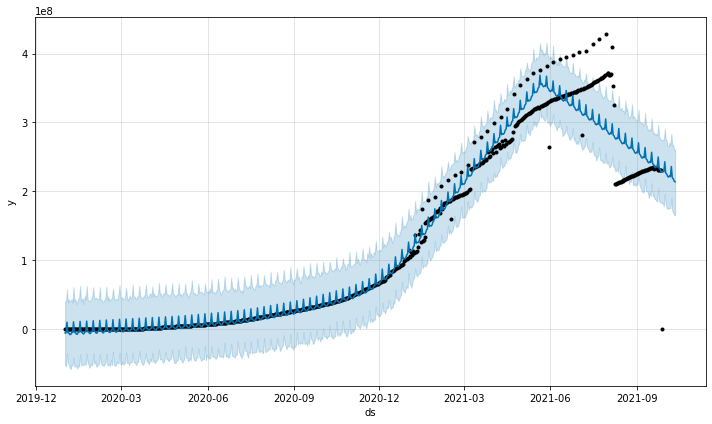

In [30]:
#we can plot the forecast by calling the Prophet.plot method and passing in our dataframe
confirmedCases_forecast_plot=model.plot(forecast)

In [31]:
#even we wanna to predict one week and two weeks for confirmedDeaths cases in the world

In [32]:
model=Prophet(interval_width=0.95)#0.95 is confidence interval of statistics. actually means still has 5% error.
model.fit(confirmedDeaths)
future=model.make_future_dataframe(periods=7)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
639 2021-10-01
640 2021-10-02
641 2021-10-03
642 2021-10-04
643 2021-10-05

In [33]:
forecast=model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

ds          yhat    yhat_lower    yhat_upper
639 2021-10-01  5.023657e+06  4.022965e+06  6.043795e+06
640 2021-10-02  4.654755e+06  3.640853e+06  5.638791e+06
641 2021-10-03  4.623787e+06  3.580893e+06  5.673305e+06
642 2021-10-04  4.553579e+06  3.565426e+06  5.569604e+06
643 2021-10-05  4.518232e+06  3.420289e+06  5.631607e+06

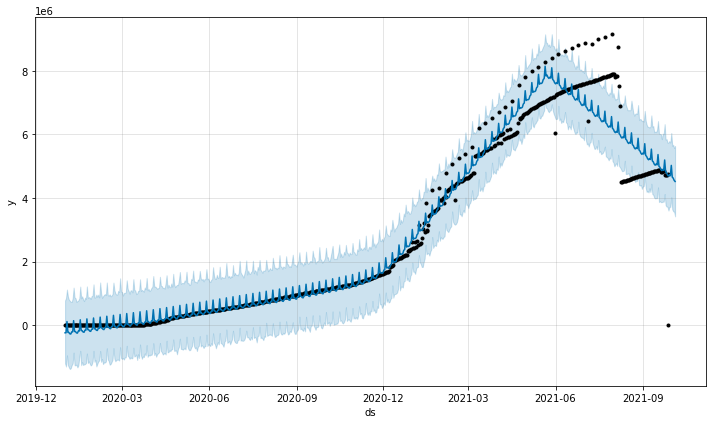

In [34]:
#we can plot the forecast by calling the Prophet.plot method and passing in our dataframe
confirmedDeaths_forecast_plot=model.plot(forecast)

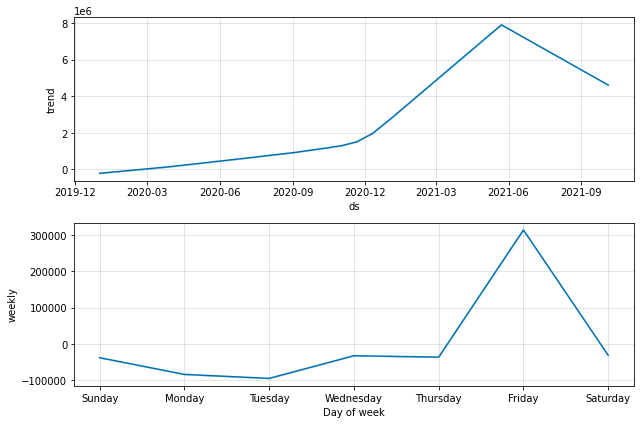

In [35]:
#with the components we could see more detail en each day.
confirmedDeaths_forecast_plot=model.plot_components(forecast)

In [36]:
#For two weeks
model=Prophet(interval_width=0.95)#0.95 is confidence interval of statistics. actually means still has 5% error.
model.fit(confirmedDeaths)
future=model.make_future_dataframe(periods=14)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
646 2021-10-08
647 2021-10-09
648 2021-10-10
649 2021-10-11
650 2021-10-12

In [37]:
forecast=model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

ds          yhat    yhat_lower    yhat_upper
646 2021-10-08  4.853140e+06  3.757356e+06  5.862143e+06
647 2021-10-09  4.484238e+06  3.360149e+06  5.573245e+06
648 2021-10-10  4.453269e+06  3.361305e+06  5.437153e+06
649 2021-10-11  4.383062e+06  3.340144e+06  5.453017e+06
650 2021-10-12  4.347714e+06  3.258562e+06  5.380507e+06

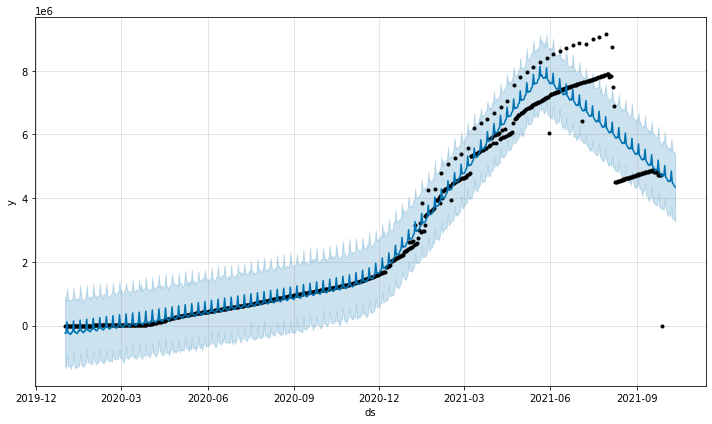

In [38]:
#we can plot the forecast by calling the Prophet.plot method and passing in our dataframe
confirmedDeaths_forecast_plot=model.plot(forecast)

In [39]:
#Now we want to check virus with mortality.
#check virus for mortality 
#creat a new dataframe aad comlumn "mortality"

df_mortality=df[["date","confirmedCases","confirmedDeaths"]]
df_mortality

date  confirmedCases  confirmedDeaths
0      2020-01-01             NaN              NaN
1      2020-01-02             NaN              NaN
2      2020-01-03             NaN              NaN
3      2020-01-04             NaN              NaN
4      2020-01-05             NaN              NaN
...           ...             ...              ...
135106 2021-09-24        129134.0           4600.0
135107 2021-09-25        129505.0           4603.0
135108 2021-09-26        129625.0           4604.0
135109 2021-09-27        129919.0           4607.0
135110 2021-09-28             NaN              NaN

[135111 rows x 3 columns]

In [40]:
#drop NaN,because they are not tkae info
df_mortality=df_mortality.dropna()
df_mortality


date  confirmedCases  confirmedDeaths
21     2020-01-22             0.0              0.0
22     2020-01-23             0.0              0.0
23     2020-01-24             0.0              0.0
24     2020-01-25             0.0              0.0
25     2020-01-26             0.0              0.0
...           ...             ...              ...
135105 2021-09-23        129134.0           4600.0
135106 2021-09-24        129134.0           4600.0
135107 2021-09-25        129505.0           4603.0
135108 2021-09-26        129625.0           4604.0
135109 2021-09-27        129919.0           4607.0

[123685 rows x 3 columns]

In [41]:
pd.to_numeric(df_mortality['confirmedCases'], errors='coerce').notnull().all()

True

In [42]:
pd.to_numeric(df_mortality['confirmedDeaths'], errors='coerce').notnull().all()

True

In [43]:
df_mortality.mean(numeric_only=True)

confirmedCases     642871.786134
confirmedDeaths     14753.288022
dtype: float64

In [44]:
#change 0 to mean value for caculate mortality
#df_mortality['confirmedCases']=df_mortality['confirmedCases'].replace(0,df_mortality['confirmedCases'].mean())
df_mortality.replace(0,df_mortality.mean(numeric_only=True,axis=0),inplace=True)
print(df_mortality)

             date  confirmedCases  confirmedDeaths
21     2020-01-22   642871.786134     14753.288022
22     2020-01-23   642871.786134     14753.288022
23     2020-01-24   642871.786134     14753.288022
24     2020-01-25   642871.786134     14753.288022
25     2020-01-26   642871.786134     14753.288022
...           ...             ...              ...
135105 2021-09-23   129134.000000      4600.000000
135106 2021-09-24   129134.000000      4600.000000
135107 2021-09-25   129505.000000      4603.000000
135108 2021-09-26   129625.000000      4604.000000
135109 2021-09-27   129919.000000      4607.000000

[123685 rows x 3 columns]


In [45]:
#creat a new column mortality by means用平均值求死亡率
df_mortality['mortality'] = df_mortality['confirmedDeaths']/ df_mortality['confirmedCases']
df_mortality

date  confirmedCases  confirmedDeaths  mortality
21     2020-01-22   642871.786134     14753.288022   0.022949
22     2020-01-23   642871.786134     14753.288022   0.022949
23     2020-01-24   642871.786134     14753.288022   0.022949
24     2020-01-25   642871.786134     14753.288022   0.022949
25     2020-01-26   642871.786134     14753.288022   0.022949
...           ...             ...              ...        ...
135105 2021-09-23   129134.000000      4600.000000   0.035622
135106 2021-09-24   129134.000000      4600.000000   0.035622
135107 2021-09-25   129505.000000      4603.000000   0.035543
135108 2021-09-26   129625.000000      4604.000000   0.035518
135109 2021-09-27   129919.000000      4607.000000   0.035461

[123685 rows x 4 columns]

In [46]:
mortality_2=df_mortality[["date","mortality"]]
mortality_2

date  mortality
21     2020-01-22   0.022949
22     2020-01-23   0.022949
23     2020-01-24   0.022949
24     2020-01-25   0.022949
25     2020-01-26   0.022949
...           ...        ...
135105 2021-09-23   0.035622
135106 2021-09-24   0.035622
135107 2021-09-25   0.035543
135108 2021-09-26   0.035518
135109 2021-09-27   0.035461

[123685 rows x 2 columns]

In [47]:
mortality_2.columns=["ds","y"]
#mortality_2["ds"]=mortality_2["ds"].dt.date
mortality_2["ds"]=pd.to_datetime(mortality_2["ds"])
mortality_2

ds         y
21     2020-01-22  0.022949
22     2020-01-23  0.022949
23     2020-01-24  0.022949
24     2020-01-25  0.022949
25     2020-01-26  0.022949
...           ...       ...
135105 2021-09-23  0.035622
135106 2021-09-24  0.035622
135107 2021-09-25  0.035543
135108 2021-09-26  0.035518
135109 2021-09-27  0.035461

[123685 rows x 2 columns]

In [48]:
mortality_2 = mortality_2.head(1000)

In [49]:
#predict
model=Prophet(interval_width=0.95)#0.95 is confidence interval of statistics. actually means still has 5% error.
model.fit(mortality_2)
future=model.make_future_dataframe(periods=15)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
625 2021-10-08
626 2021-10-09
627 2021-10-10
628 2021-10-11
629 2021-10-12

In [50]:
#predicting the future with date, and upper and lower limit of y value. 这里设置上限和下限为了容差
forecast=model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

ds       yhat  yhat_lower  yhat_upper
625 2021-10-08  -2.974366 -745.327793  771.179831
626 2021-10-09 -12.660257 -773.391622  729.516602
627 2021-10-10 -16.015389 -782.285700  728.597892
628 2021-10-11  52.978222 -692.987232  842.591478
629 2021-10-12  11.127447 -736.083171  729.465154

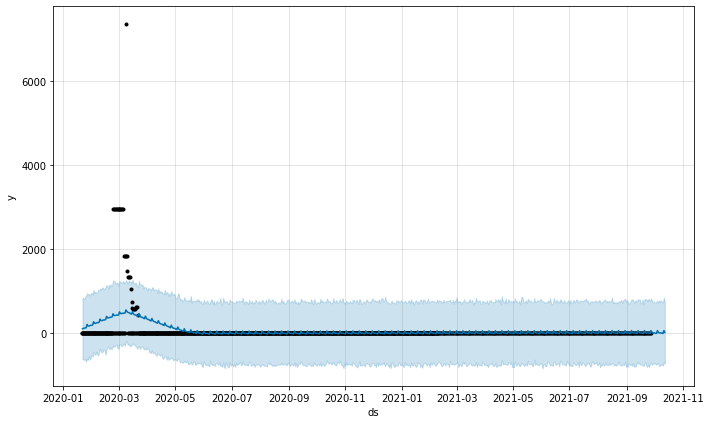

In [51]:
#we can plot the forecast by calling the Prophet.plot method and passing in our dataframe
mortality_2_forecast_plot=model.plot(forecast)
#黑点是实际数值，蓝线是预测数值，我们可以看出死亡率在容差之内，但是在一开始爆发的时候实际数值超出预测数值。

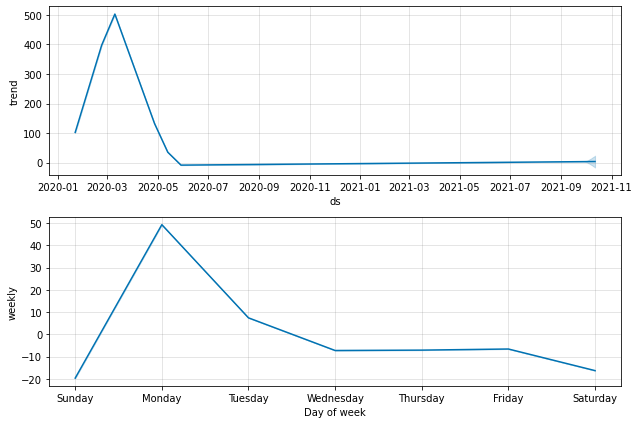

In [52]:
#with the components we could see more detail en each day.
confirmed_forecast_plot=model.plot_components(forecast)

In [53]:
#mortality list求和了，也许应该不求和 No use
mortality_1=df_mortality.groupby("date").sum()["mortality"].reset_index()
mortality_1

date     mortality
0   2020-01-22  70082.211163
1   2020-01-23  92212.071439
2   2020-01-24  64426.689597
3   2020-01-25  75491.611353
4   2020-01-26  74753.898190
..         ...           ...
610 2021-09-23   8379.745088
611 2021-09-24   8371.920152
612 2021-09-25   8368.482630
613 2021-09-26   8367.916543
614 2021-09-27   8364.580311

[615 rows x 2 columns]

In [54]:
mortality_1.columns=["ds","y"]
#mortality_1["ds"]=mortality_1["ds"].dt.date
mortality_1["ds"]=pd.to_datetime(mortality_1["ds"])
mortality_1

ds             y
0   2020-01-22  70082.211163
1   2020-01-23  92212.071439
2   2020-01-24  64426.689597
3   2020-01-25  75491.611353
4   2020-01-26  74753.898190
..         ...           ...
610 2021-09-23   8379.745088
611 2021-09-24   8371.920152
612 2021-09-25   8368.482630
613 2021-09-26   8367.916543
614 2021-09-27   8364.580311

[615 rows x 2 columns]

In [55]:
#predict
model=Prophet(interval_width=0.95)#0.95 is confidence interval of statistics. actually means still has 5% error.
model.fit(mortality_1)
future=model.make_future_dataframe(periods=15)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
625 2021-10-08
626 2021-10-09
627 2021-10-10
628 2021-10-11
629 2021-10-12

In [56]:
#predicting the future with date, and upper and lower limit of y value. 这里设置上限和下限为了容差
forecast=model.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

ds          yhat    yhat_lower    yhat_upper
625 2021-10-08   9633.676314 -81837.657079  97472.315214
626 2021-10-09  10511.607474 -75913.055461  94014.191893
627 2021-10-10   9410.225403 -73484.804545  97187.411586
628 2021-10-11  10426.076115 -78492.462027  98373.741719
629 2021-10-12  10129.618546 -84035.424899  98517.850143

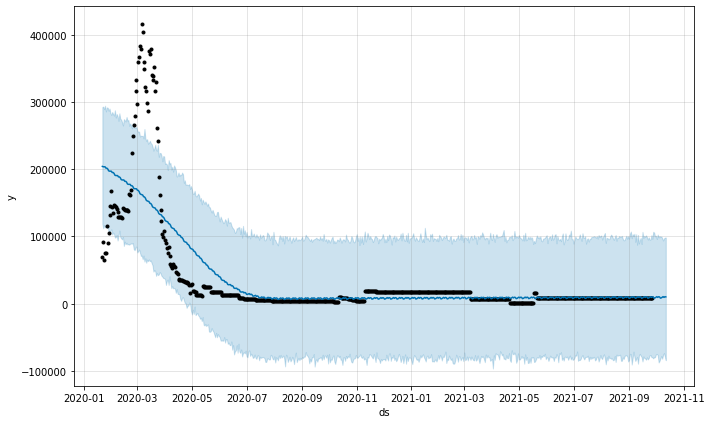

In [57]:
#we can plot the forecast by calling the Prophet.plot method and passing in our dataframe
confirmedCases_forecast_plot=model.plot(forecast)
#黑点是原始值， 蓝色的线是预测值，我们可以发现在2020年一月到2020年4月，也就是爆发初期， 死亡率高于预测值，后来真是数值在容差之内。

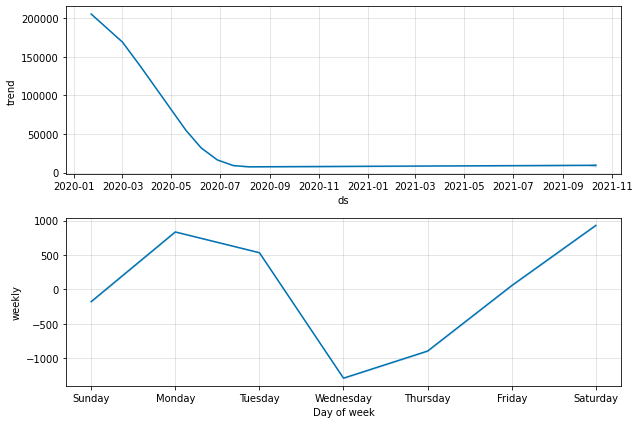

In [58]:
#with the components we could see more detail en each day.
confirmed_forecast_plot=model.plot_components(forecast)

In [59]:
#新建表格选相关变量
df_2=df[["date","confirmedCases","confirmedDeaths"]]

#delete Nan
df_2.dropna()


date  confirmedCases  confirmedDeaths
21     2020-01-22             0.0              0.0
22     2020-01-23             0.0              0.0
23     2020-01-24             0.0              0.0
24     2020-01-25             0.0              0.0
25     2020-01-26             0.0              0.0
...           ...             ...              ...
135105 2021-09-23        129134.0           4600.0
135106 2021-09-24        129134.0           4600.0
135107 2021-09-25        129505.0           4603.0
135108 2021-09-26        129625.0           4604.0
135109 2021-09-27        129919.0           4607.0

[123685 rows x 3 columns]

In [60]:
#增加新列死亡率mortality
df_2["mortality"]=df_2["confirmedDeaths"]/df_2["confirmedCases"]
df_3=df_2.dropna()
#change inf to 0
df_4=df_3.replace(np.inf,0)
df_4
#now the frame is clean!

date  confirmedCases  confirmedDeaths  mortality
54     2020-02-24             5.0              0.0   0.000000
55     2020-02-25             5.0              0.0   0.000000
56     2020-02-26             5.0              0.0   0.000000
57     2020-02-27             5.0              0.0   0.000000
58     2020-02-28             5.0              0.0   0.000000
...           ...             ...              ...        ...
135105 2021-09-23        129134.0           4600.0   0.035622
135106 2021-09-24        129134.0           4600.0   0.035622
135107 2021-09-25        129505.0           4603.0   0.035543
135108 2021-09-26        129625.0           4604.0   0.035518
135109 2021-09-27        129919.0           4607.0   0.035461

[115082 rows x 4 columns]

<AxesSubplot:xlabel='date'>

<Figure size 432x288 with 0 Axes>

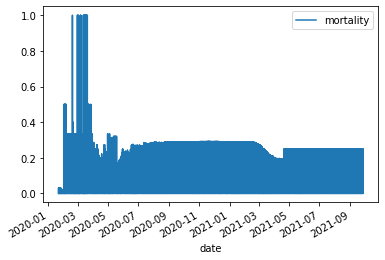

In [61]:
plt.figure();
df_4.plot(x="date",y="mortality")


In [2]:
##check stationary,if not ,conveting to stationary,all of those 3 features are Non-stationary,because the figure is statble.(自相关图应该不平稳才说明他是稳定的)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_4.confirmedCases) #autocorrelation of confirmedCases

NameError: name 'df_4' is not defined

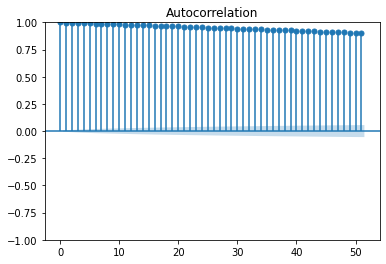

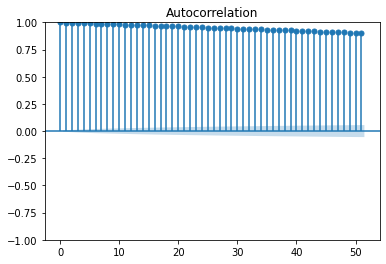

In [63]:
#autocorrelation of confirmedDeaths
plot_acf(df_4.confirmedDeaths)

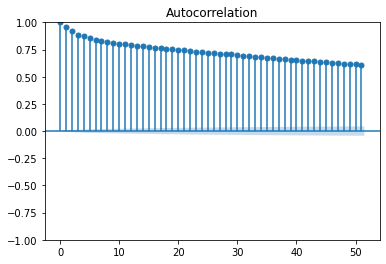

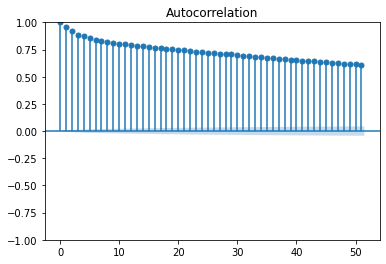

In [64]:
#autocorrelation of mortality
plot_acf(df_4.mortality)

In [65]:
df_4_diff=df_4.diff(periods=2000)#difference series, integrared of order 2000 for staionary data.差异性，积分为了让数据变稳定
#df_4_diff=df_4["confirmedCases"].diff[1:]#drop Nan
df_5_diff=df_4_diff.dropna()
df_5_diff
#d for difference is one of the parameter of ARIMA model

date  confirmedCases  confirmedDeaths  mortality
2241   276 days          6529.0             76.0   0.011631
2242   276 days          6605.0             76.0   0.011498
2243   276 days          6605.0             76.0   0.011498
2244   276 days          6707.0             76.0   0.011323
2245   276 days          6740.0             76.0   0.011268
...         ...             ...              ...        ...
135105 348 days        128027.0           4565.0   0.004005
135106 348 days        128025.0           4565.0   0.004062
135107 348 days        128395.0           4568.0   0.004011
135108 348 days        128512.0           4569.0   0.004071
135109 348 days        128797.0           4572.0   0.004266

[113082 rows x 4 columns]

<AxesSubplot:>

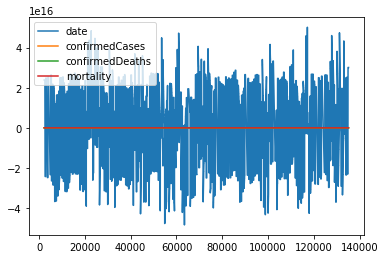

In [66]:
df_5_diff.plot()#we can see alomst stationary from the plot

In [67]:
df_5_diff#here "date" is class "timedelta",we have to convert to number or string


date  confirmedCases  confirmedDeaths  mortality
2241   276 days          6529.0             76.0   0.011631
2242   276 days          6605.0             76.0   0.011498
2243   276 days          6605.0             76.0   0.011498
2244   276 days          6707.0             76.0   0.011323
2245   276 days          6740.0             76.0   0.011268
...         ...             ...              ...        ...
135105 348 days        128027.0           4565.0   0.004005
135106 348 days        128025.0           4565.0   0.004062
135107 348 days        128395.0           4568.0   0.004011
135108 348 days        128512.0           4569.0   0.004071
135109 348 days        128797.0           4572.0   0.004266

[113082 rows x 4 columns]

In [68]:
#convert timedelta to number
df_5_diff.dtypes

date               timedelta64[ns]
confirmedCases             float64
confirmedDeaths            float64
mortality                  float64
dtype: object

In [69]:
df_5_diff["date"].idxmax()#find which row is the max value of date(so is the row 117118)

117118

In [70]:
df_5_diff

date  confirmedCases  confirmedDeaths  mortality
2241   276 days          6529.0             76.0   0.011631
2242   276 days          6605.0             76.0   0.011498
2243   276 days          6605.0             76.0   0.011498
2244   276 days          6707.0             76.0   0.011323
2245   276 days          6740.0             76.0   0.011268
...         ...             ...              ...        ...
135105 348 days        128027.0           4565.0   0.004005
135106 348 days        128025.0           4565.0   0.004062
135107 348 days        128395.0           4568.0   0.004011
135108 348 days        128512.0           4569.0   0.004071
135109 348 days        128797.0           4572.0   0.004266

[113082 rows x 4 columns]

In [71]:
#convert to float firstly
df_6_diff=df_5_diff['date'] / np.timedelta64(1, 'D')
df_6_diff

2241      276.0
2242      276.0
2243      276.0
2244      276.0
2245      276.0
          ...  
135105    348.0
135106    348.0
135107    348.0
135108    348.0
135109    348.0
Name: date, Length: 113082, dtype: float64

In [72]:
#merge 2 dataframes
df_7_diff=pd.merge(df_6_diff, df_5_diff, left_index=True, right_index=True)
df_7_diff

date_x   date_y  confirmedCases  confirmedDeaths  mortality
2241     276.0 276 days          6529.0             76.0   0.011631
2242     276.0 276 days          6605.0             76.0   0.011498
2243     276.0 276 days          6605.0             76.0   0.011498
2244     276.0 276 days          6707.0             76.0   0.011323
2245     276.0 276 days          6740.0             76.0   0.011268
...        ...      ...             ...              ...        ...
135105   348.0 348 days        128027.0           4565.0   0.004005
135106   348.0 348 days        128025.0           4565.0   0.004062
135107   348.0 348 days        128395.0           4568.0   0.004011
135108   348.0 348 days        128512.0           4569.0   0.004071
135109   348.0 348 days        128797.0           4572.0   0.004266

[113082 rows x 5 columns]

In [73]:
#drop column date_y
df_8_diff=df_7_diff.drop(["date_y"], axis=1)
df_8_diff

date_x  confirmedCases  confirmedDeaths  mortality
2241     276.0          6529.0             76.0   0.011631
2242     276.0          6605.0             76.0   0.011498
2243     276.0          6605.0             76.0   0.011498
2244     276.0          6707.0             76.0   0.011323
2245     276.0          6740.0             76.0   0.011268
...        ...             ...              ...        ...
135105   348.0        128027.0           4565.0   0.004005
135106   348.0        128025.0           4565.0   0.004062
135107   348.0        128395.0           4568.0   0.004011
135108   348.0        128512.0           4569.0   0.004071
135109   348.0        128797.0           4572.0   0.004266

[113082 rows x 4 columns]

In [74]:
#rename date_x to date and now the data differences is clean 
df_9_diff=df_8_diff.rename(columns={"date_x": "date"})
df_9_diff

date  confirmedCases  confirmedDeaths  mortality
2241    276.0          6529.0             76.0   0.011631
2242    276.0          6605.0             76.0   0.011498
2243    276.0          6605.0             76.0   0.011498
2244    276.0          6707.0             76.0   0.011323
2245    276.0          6740.0             76.0   0.011268
...       ...             ...              ...        ...
135105  348.0        128027.0           4565.0   0.004005
135106  348.0        128025.0           4565.0   0.004062
135107  348.0        128395.0           4568.0   0.004011
135108  348.0        128512.0           4569.0   0.004071
135109  348.0        128797.0           4572.0   0.004266

[113082 rows x 4 columns]

In [75]:
df_9_diff.to_csv("covid by time series")

In [76]:
#######try to use prophet in df_4, because df_4 is clean and completely
#mortality
mortality_3=df_4[["date","mortality"]]
mortality_3


date  mortality
54     2020-02-24   0.000000
55     2020-02-25   0.000000
56     2020-02-26   0.000000
57     2020-02-27   0.000000
58     2020-02-28   0.000000
...           ...        ...
135105 2021-09-23   0.035622
135106 2021-09-24   0.035622
135107 2021-09-25   0.035543
135108 2021-09-26   0.035518
135109 2021-09-27   0.035461

[115082 rows x 2 columns]

In [77]:
mortality_3.columns=["ds","y"]
#mortality_3["ds"]=mortality_3["ds"].dt.date
mortality_3["ds"]=pd.to_datetime(mortality_3["ds"])
mortality_3

ds         y
54     2020-02-24  0.000000
55     2020-02-25  0.000000
56     2020-02-26  0.000000
57     2020-02-27  0.000000
58     2020-02-28  0.000000
...           ...       ...
135105 2021-09-23  0.035622
135106 2021-09-24  0.035622
135107 2021-09-25  0.035543
135108 2021-09-26  0.035518
135109 2021-09-27  0.035461

[115082 rows x 2 columns]

In [78]:
#mortality_3 = mortality_3.head(2000)

In [79]:
#predict
model=Prophet(interval_width=0.95)#0.95 is confidence interval of statistics. actually means still has 5% error.
model.fit(mortality_3)
future=model.make_future_dataframe(periods=15,freq="D")
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
625 2021-10-08
626 2021-10-09
627 2021-10-10
628 2021-10-11
629 2021-10-12

In [80]:
#predicting the future with date, and upper and lower limit of y value. 这里设置上限和下限为了容差
forecast=model.predict(future)
#forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()
forecast.tail()
#here we could see daily mortality 0.021

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
625 2021-10-08  0.021575   -0.041406    0.083286     0.021052     0.022159   
626 2021-10-09  0.021576   -0.040260    0.082379     0.020999     0.022231   
627 2021-10-10  0.021578   -0.040960    0.081467     0.020924     0.022331   
628 2021-10-11  0.021579   -0.038642    0.082576     0.020845     0.022415   
629 2021-10-12  0.021580   -0.040148    0.086354     0.020736     0.022499   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
625       -0.000046             -0.000046             -0.000046 -0.000046   
626        0.000035              0.000035              0.000035  0.000035   
627       -0.000048             -0.000048             -0.000048 -0.000048   
628        0.000032              0.000032              0.000032  0.000032   
629       -0.000047             -0.000047             -0.000047 -0.000047   

     weekly_lower  weekly_upper  multiplicative_terms  \
625     -0.000046     -0.000046                   0.0   
626      0.000035      0.000035                   0.0   
627     -0.000048     -0.000048                   0.0   
628      0.000032      0.000032                   0.0   
629     -0.000047     -0.000047                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper      yhat  
625                         0.0                         0.0  0.021529  
626                         0.0                         0.0  0.021612  
627                         0.0                         0.0  0.021529  
628                         0.0                         0.0  0.021611  
629                         0.0                         0.0  0.021533

In [81]:
forecast[["ds","yhat"]]

ds      yhat
0   2020-01-22  0.002660
1   2020-01-23  0.003032
2   2020-01-24  0.003346
3   2020-01-25  0.003816
4   2020-01-26  0.004121
..         ...       ...
625 2021-10-08  0.021529
626 2021-10-09  0.021612
627 2021-10-10  0.021529
628 2021-10-11  0.021611
629 2021-10-12  0.021533

[630 rows x 2 columns]

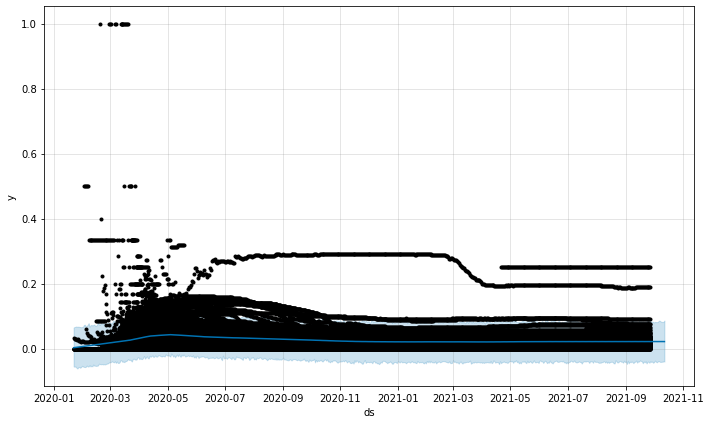

In [82]:
#we can plot the forecast by calling the Prophet.plot method and passing in our dataframe
confirmedCases_forecast_plot=model.plot(forecast)
#黑点是原始值， 蓝色的线是预测值，我们可以发现在2020年一月到2020年4月，也就是爆发初期， 死亡率高于预测值，后来真是数值在容差之内。
#The black dot is the original value, and the blue line is the predicted value. We can find that from January 2020 to April 2020, that is, at the beginning of the outbreak, the mortality rate is higher than the predicted value, and then the value is really within the tolerance.
#同时全球死亡率并没有特别大的变化，一直在降低。
#At the same time, the global mortality rate has not changed significantly, and has been decreasing.

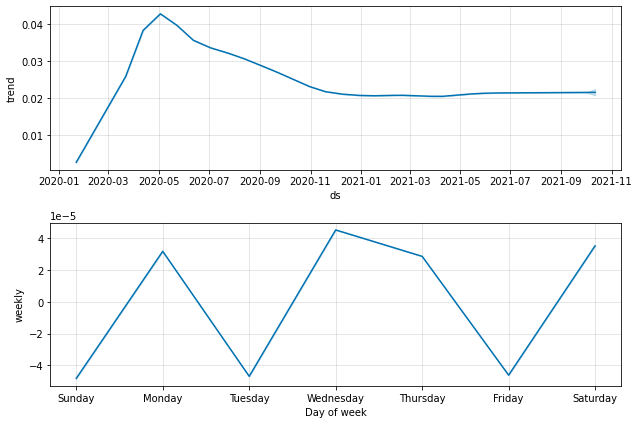

In [83]:
#with the components we could see more detail en each day.
confirmed_forecast_plot=model.plot_components(forecast)

In [84]:
#confirmedCases
confirmedCases_3=df_4[["date","confirmedCases"]]
confirmedCases_3

date  confirmedCases
54     2020-02-24             5.0
55     2020-02-25             5.0
56     2020-02-26             5.0
57     2020-02-27             5.0
58     2020-02-28             5.0
...           ...             ...
135105 2021-09-23        129134.0
135106 2021-09-24        129134.0
135107 2021-09-25        129505.0
135108 2021-09-26        129625.0
135109 2021-09-27        129919.0

[115082 rows x 2 columns]

In [85]:
confirmedCases_3.columns=["ds","y"]
#confirmedCases_3["ds"]=confirmedCases_3["ds"].dt.date
confirmedCases_3["ds"]=pd.to_datetime(confirmedCases_3["ds"])
confirmedCases_3

ds         y
54     2020-02-24       5.0
55     2020-02-25       5.0
56     2020-02-26       5.0
57     2020-02-27       5.0
58     2020-02-28       5.0
...           ...       ...
135105 2021-09-23  129134.0
135106 2021-09-24  129134.0
135107 2021-09-25  129505.0
135108 2021-09-26  129625.0
135109 2021-09-27  129919.0

[115082 rows x 2 columns]

In [86]:
confirmedCases_3 = confirmedCases_3.head(2000)
confirmedCases

ds            y
0   2020-01-01          0.0
1   2020-01-02          0.0
2   2020-01-03          0.0
3   2020-01-04          0.0
4   2020-01-05          0.0
..         ...          ...
632 2021-09-24  230336702.0
633 2021-09-25  230697743.0
634 2021-09-26  231026535.0
635 2021-09-27  231512677.0
636 2021-09-28          0.0

[637 rows x 2 columns]

In [87]:
#predict
model=Prophet(interval_width=0.95)#0.95 is confidence interval of statistics. actually means still has 5% error.
model.fit(confirmedCases_3)
future=model.make_future_dataframe(periods=15,freq="D")
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
592 2021-10-08
593 2021-10-09
594 2021-10-10
595 2021-10-11
596 2021-10-12

In [88]:
#predicting the future with date, and upper and lower limit of y value. 这里设置上限和下限为了容差
forecast=model.predict(future)
#forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()
forecast.tail()
#here we could see predicted everyday confirmedcases about 180743cases.

ds          trend     yhat_lower     yhat_upper    trend_lower  \
592 2021-10-08  180683.588663  141516.358935  219052.885864  180344.703983   
593 2021-10-09  181157.429991  147012.421400  218010.049911  180773.160714   
594 2021-10-10  181631.271319  144086.923596  219364.902010  181201.801822   
595 2021-10-11  182105.112646  143554.267321  216590.984106  181630.442930   
596 2021-10-12  182578.953974  141846.015054  222026.782787  182053.322039   

       trend_upper  additive_terms  additive_terms_lower  \
592  180999.399370       60.189626             60.189626   
593  181519.907222       22.349780             22.349780   
594  182057.656223      -30.947737            -30.947737   
595  182573.271010      -31.829750            -31.829750   
596  183087.333577      -33.810678            -33.810678   

     additive_terms_upper     weekly  weekly_lower  weekly_upper  \
592             60.189626  60.189626     60.189626     60.189626   
593             22.349780  22.349780     22.349780     22.349780   
594            -30.947737 -30.947737    -30.947737    -30.947737   
595            -31.829750 -31.829750    -31.829750    -31.829750   
596            -33.810678 -33.810678    -33.810678    -33.810678   

     multiplicative_terms  multiplicative_terms_lower  \
592                   0.0                         0.0   
593                   0.0                         0.0   
594                   0.0                         0.0   
595                   0.0                         0.0   
596                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
592                         0.0  180743.778289  
593                         0.0  181179.779771  
594                         0.0  181600.323582  
595                         0.0  182073.282896  
596                         0.0  182545.143296

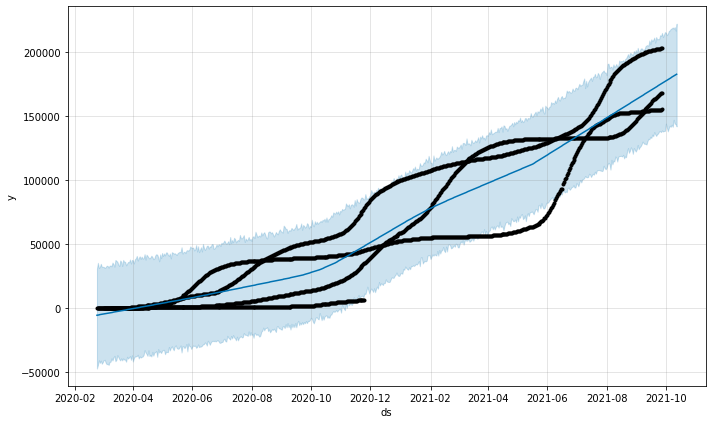

In [89]:
#we can plot the forecast by calling the Prophet.plot method and passing in our dataframe
confirmedCases_forecast_plot=model.plot(forecast)
#the trend is increases 

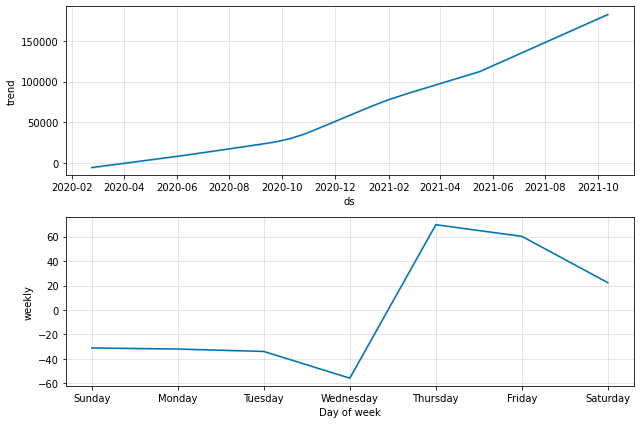

In [90]:
#with the components we could see more detail en each day.
confirmed_forecast_plot=model.plot_components(forecast)

In [91]:
#confirmedDeaths
confirmedDeaths_3=df_4[["date","confirmedDeaths"]]
confirmedDeaths_3

date  confirmedDeaths
54     2020-02-24              0.0
55     2020-02-25              0.0
56     2020-02-26              0.0
57     2020-02-27              0.0
58     2020-02-28              0.0
...           ...              ...
135105 2021-09-23           4600.0
135106 2021-09-24           4600.0
135107 2021-09-25           4603.0
135108 2021-09-26           4604.0
135109 2021-09-27           4607.0

[115082 rows x 2 columns]

In [92]:
confirmedDeaths_3.columns=["ds","y"]
#confirmedDeaths_3["ds"]=confirmedDeaths_3["ds"].dt.date
confirmedDeaths_3["ds"]=pd.to_datetime(confirmedDeaths_3["ds"])
confirmedDeaths_3

ds       y
54     2020-02-24     0.0
55     2020-02-25     0.0
56     2020-02-26     0.0
57     2020-02-27     0.0
58     2020-02-28     0.0
...           ...     ...
135105 2021-09-23  4600.0
135106 2021-09-24  4600.0
135107 2021-09-25  4603.0
135108 2021-09-26  4604.0
135109 2021-09-27  4607.0

[115082 rows x 2 columns]

In [93]:
#predict
model=Prophet(interval_width=0.95)#0.95 is confidence interval of statistics. actually means still has 5% error.
model.fit(confirmedDeaths_3)
future=model.make_future_dataframe(periods=15,freq="D")
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
625 2021-10-08
626 2021-10-09
627 2021-10-10
628 2021-10-11
629 2021-10-12

In [94]:
#predicting the future with date, and upper and lower limit of y value. 这里设置上限和下限为了容差
forecast=model.predict(future)
#forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()
forecast.tail()
#here we could see confirmeddeath everyday 24020.

ds         trend    yhat_lower     yhat_upper   trend_lower  \
625 2021-10-08  24664.938263 -87184.533700  131255.540925  24454.744039   
626 2021-10-09  24592.181464 -82016.742295  132063.595853  24348.782363   
627 2021-10-10  24519.424665 -79369.305058  127456.681013  24249.084040   
628 2021-10-11  24446.667866 -79252.224982  130033.619151  24143.322693   
629 2021-10-12  24373.911067 -86902.590652  126294.133209  24044.981665   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
625  24828.386836     -644.291444           -644.291444           -644.291444   
626  24785.233438      170.217460            170.217460            170.217460   
627  24753.415402      150.244516            150.244516            150.244516   
628  24730.753941      -96.644244            -96.644244            -96.644244   
629  24699.618279      122.082647            122.082647            122.082647   

         weekly  weekly_lower  weekly_upper  multiplicative_terms  \
625 -644.291444   -644.291444   -644.291444                   0.0   
626  170.217460    170.217460    170.217460                   0.0   
627  150.244516    150.244516    150.244516                   0.0   
628  -96.644244    -96.644244    -96.644244                   0.0   
629  122.082647    122.082647    122.082647                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
625                         0.0                         0.0  24020.646819  
626                         0.0                         0.0  24762.398924  
627                         0.0                         0.0  24669.669182  
628                         0.0                         0.0  24350.023622  
629                         0.0                         0.0  24495.993714

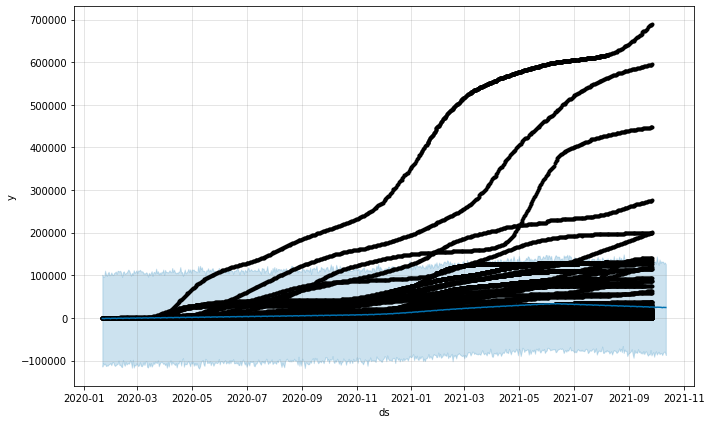

In [95]:
#we can plot the forecast by calling the Prophet.plot method and passing in our dataframe
confirmedCases_forecast_plot=model.plot(forecast)

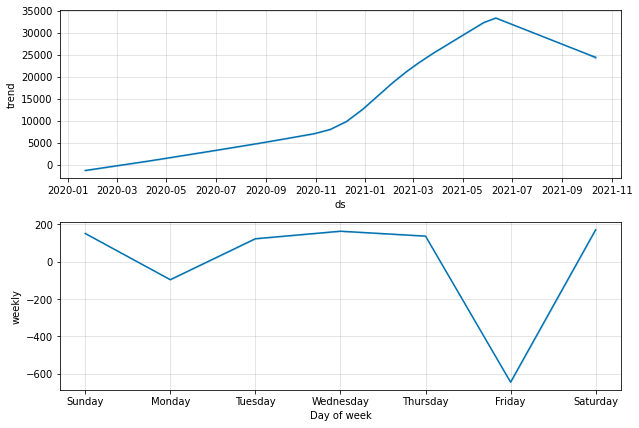

In [96]:
#with the components we could see more detail en each day.
confirmed_forecast_plot=model.plot_components(forecast)

### resume: In gengeral,

####ARIMA model for forecating.using data_9_diff dataframe because this dataframe now the sationary.

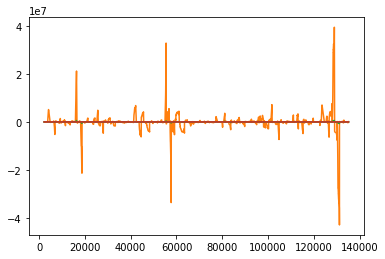

In [97]:
plt.plot(df_9_diff)

In [6]:
#split dataset df_9_diff to train and test data,80%train data ,20%test data

training_data = df_9_diff.sample(frac=0.8, random_state=25)#80%
testing_data = df_9_diff.drop(training_data.index)#20%
predictions=[]

NameError: name 'df_9_diff' is not defined

In [99]:
len(training_data.values.reshape(-1).tolist())# for reshape datset.

361864

<AxesSubplot:>

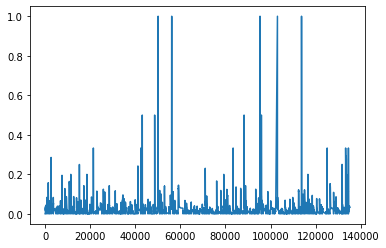

In [100]:
df_4.mortality.plot()

In [100]:
#for dicky fuller test have to test three times and check staionary,and make prediction

In [101]:
#test confirmedCases
confirmedCases = df_9_diff.loc[:, 'confirmedCases'].values#creat a new dataset just one column"confirmedCases"
confirmedCases

array([  6529.,   6605.,   6605., ..., 128395., 128512., 128797.])

In [102]:
#ADF test,check p value---notice shape error,because adfuller just allowed to be onle 1 demensional dataset.
#test confirmedCases p value=4.72490347709713e-19,p<0.05,rejected H0 hispotisis,so the data confirmedCases is stationary

from statsmodels.tsa.stattools import adfuller

result = adfuller(confirmedCases)
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    


ADF Statistic: -10.648593504486652
n_lags: 4.72490347709713e-19
p-value: 4.72490347709713e-19
Critial Values:
   1%, -3.430407829772008
Critial Values:
   5%, -2.861565559885793
Critial Values:
   10%, -2.566783604627131


In [103]:
#confirmedDeaths
confirmedDeaths = df_9_diff.loc[:, 'confirmedDeaths'].values#creat a new dataset just one column"confirmedDeaths"
confirmedDeaths

array([  76.,   76.,   76., ..., 4568., 4569., 4572.])

In [104]:
result = adfuller(confirmedDeaths)#test confirmedDeaths p value=4.40084426389683e-18,p<0.05,rejected H0 hispotisis,so the data confirmedDeaths is stationary
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -10.25435786715422
n_lags: 4.40084426389683e-18
p-value: 4.40084426389683e-18
Critial Values:
   1%, -3.430407829772008
Critial Values:
   5%, -2.861565559885793
Critial Values:
   10%, -2.566783604627131


In [105]:
#mortality
mortality = df_9_diff.loc[:, 'mortality'].values#creat a new dataset just one column"mortality"
mortality

array([0.01163147, 0.01149773, 0.01149773, ..., 0.0040115 , 0.0040713 ,
       0.00426626])

In [106]:
#test mortality p value=0.0, p<0.05,rejected H0,so the dataset is stationary as well!
result = adfuller(mortality)
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -19.365986481171273
n_lags: 0.0
p-value: 0.0
Critial Values:
   1%, -3.430407848188737
Critial Values:
   5%, -2.8615655680256293
Critial Values:
   10%, -2.566783608959693


In [106]:
#build 3 different models for confirmedcases confirmedeaths and mortality and split train and test data

In [107]:
#confirmedCases and split train/test dataset
confirmedCases
#split dataset to train and test data,80%train data ,20%test data

confirmedCases_training_data = df_9_diff["confirmedCases"].sample(frac=0.8, random_state=25)#80%
confirmedCases_testing_data = df_9_diff["confirmedCases"].drop(training_data.index)#20%
confirmedCases_training_data

18620    -16983908.0
127856     5932370.0
48325        -1081.0
126133      235125.0
105402      255734.0
             ...    
84286      -248508.0
88329      -117670.0
36457      -183253.0
45966        55138.0
133923          21.0
Name: confirmedCases, Length: 90466, dtype: float64

In [108]:
#confirmedDeaths and split to train/test dataset
confirmedDeaths
#split dataset to train and test data,80%train data ,20%test data

confirmedDeaths_training_data = df_9_diff["confirmedDeaths"].sample(frac=0.8, random_state=25)#80%
confirmedDeaths_testing_data = df_9_diff["confirmedDeaths"].drop(training_data.index)#20%
confirmedDeaths_training_data

18620    -474413.0
127856    129794.0
48325         96.0
126133     -3683.0
105402      2226.0
            ...   
84286      -6210.0
88329      -2964.0
36457      -2427.0
45966        321.0
133923         0.0
Name: confirmedDeaths, Length: 90466, dtype: float64

In [109]:
#mortality and split to train/test dataset
mortality
#split dataset to train and test data,80%train data ,20%test data
mortality_training_data = df_9_diff["mortality"].sample(frac=0.8, random_state=25)#80%
mortality_testing_data = df_9_diff["mortality"].drop(training_data.index)#20%
mortality_training_data


18620    -0.024707
127856    0.011734
48325     0.012894
126133   -0.022571
105402   -0.032959
            ...   
84286    -0.015953
88329     0.020790
36457    -0.013242
45966    -0.007260
133923    0.000000
Name: mortality, Length: 90466, dtype: float64

In [5]:
#build ARIMA model for df_9_diff dataset
from statsmodels.tsa.arima_model import ARIMA
#p--periods 
#d--integrated of oredr,defference
#q--period in moving arvange model
model_arima=ARIMA(training_data.values.reshape(-1).tolist(),order=(0,1,3))
model_arima_fit=model_arima.fit()

NameError: name 'training_data' is not defined

In [4]:
#build ARIMA model for confirmedCases
#p--periods 
#d--integrated of oredr,defference
#q--period in moving arvange model
confirmedCases_model_arima=ARIMA(confirmedCases_training_data.values.reshape(-1).tolist(),order=(0,1,3))
confirmedCases_model_arima_fit=confirmedCases_model_arima.fit()
print(confirmedCases_model_arima_fit.aic)

NameError: name 'confirmedCases_training_data' is not defined

In [113]:
#build ARIMA model for confirmedDeaths
#p--periods 
#d--integrated of oredr,defference
#q--period in moving arvange model
confirmedDeaths_model_arima=ARIMA(confirmedDeaths_training_data.values.reshape(-1).tolist(),order=(0,1,3))
confirmedDeaths_model_arima_fit=confirmedDeaths_model_arima.fit()
print(confirmedDeaths_model_arima_fit.aic)

2299308.063400149


In [114]:
#build ARIMA model for mortality
#p--periods 
#d--integrated of oredr,defference
#q--period in moving arvange model
mortality_model_arima=ARIMA(mortality_training_data.values.reshape(-1).tolist(),order=(0,1,3))
mortality_model_arima_fit=mortality_model_arima.fit()
print(mortality_model_arima_fit.aic)

-302182.0735697673


In [115]:
#make prediction for three columns("confirmedCases","confirmedDeaths","mortality")


In [115]:
#confirmedCases after 15days,the result is negative because the data differences = day 2-day 1.
#so negative means the number of prection is decresing.
predictions_confirmedCases=confirmedCases_model_arima_fit.forecast(steps=15)[0]
predictions_confirmedCases

array([-2869.92589966, -2668.63219073, -2662.46648726, -2662.53390076,
       -2662.60131425, -2662.66872774, -2662.73614123, -2662.80355472,
       -2662.87096821, -2662.93838171, -2663.0057952 , -2663.07320869,
       -2663.14062218, -2663.20803567, -2663.27544917])

In [116]:
#confirmedDeaths after 15days，
predictions_confirmedDeaths=confirmedDeaths_model_arima_fit.forecast(steps=15)[0]
predictions_confirmedDeaths

array([-44.52334252, -43.01096999, -42.86784508, -42.86817482,
       -42.86850457, -42.86883431, -42.86916406, -42.86949381,
       -42.86982355, -42.8701533 , -42.87048304, -42.87081279,
       -42.87114253, -42.87147228, -42.87180202])

In [117]:
#mortality after 15days, 
predictions_mortality=mortality_model_arima_fit.forecast(steps=15)[0]
predictions_mortality

array([0.00124717, 0.00126178, 0.00126411, 0.00126413, 0.00126415,
       0.00126418, 0.0012642 , 0.00126422, 0.00126424, 0.00126426,
       0.00126429, 0.00126431, 0.00126433, 0.00126435, 0.00126437])

In [119]:
#check AIC for the most fit on the model and avoid to overfit,AIC is the most when the order(1,0,0),so we use the model ARIMA with order(1,0,0)

In [ ]:
#Try to use df_4 fit one the model

In [125]:
result = adfuller(df_4["confirmedCases"])
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -10.76496246182884
n_lags: 2.4660117641096555e-19
p-value: 2.4660117641096555e-19
Critial Values:
   1%, -3.4304068247223127
Critial Values:
   5%, -2.861565115673261
Critial Values:
   10%, -2.5667833681877017


In [128]:
#autocorrelation function(ACF)
from statsmodels.graphics.tsaplots import plot_acf

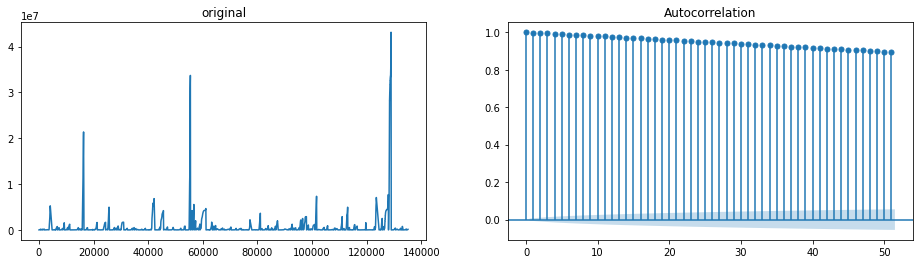

In [174]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(df_4["confirmedCases"])
ax1.set_title("original")
plot_acf(df_4["confirmedCases"],ax=ax2);

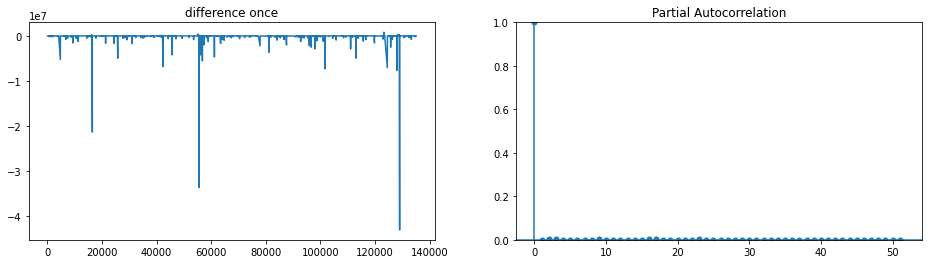

In [153]:
#pacf
from statsmodels.graphics.tsaplots import plot_pacf
diff=df_4["confirmedCases"].diff().dropna()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,4))
ax1.plot(diff)
ax1.set_title("difference once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

In [114]:
#split df_4 by train /test dataset
df_4_training_data = df_4.sample(frac=0.8, random_state=25)#80%
df_4_testing_data = df_4.drop(training_data.index)#20%
df_4_training_data

date  confirmedCases  confirmedDeaths  mortality
128534 2021-04-18      31726423.0         567383.0   0.017884
94505  2021-05-23         14910.0            154.0   0.010329
42083  2021-07-25       5916568.0         110633.0   0.018699
52667  2021-07-17         11956.0            212.0   0.017732
127186 2021-03-23       4307304.0         126284.0   0.029319
...           ...             ...              ...        ...
133578 2021-01-13          2109.0            612.0   0.290185
105174 2020-04-27          8275.0            162.0   0.019577
88649  2021-04-17          6778.0            180.0   0.026557
34945  2020-02-18             1.0              0.0   0.000000
68955  2021-02-12         75509.0           1431.0   0.018951

[92066 rows x 4 columns]

In [115]:
#creat 3 single colum of confirmedcases,/deaths/mortality
df_4_confirmedCases=df_4_training_data.confirmedCases
df_4_confirmedCases

128534    31726423.0
94505        14910.0
42083      5916568.0
52667        11956.0
127186     4307304.0
             ...    
133578        2109.0
105174        8275.0
88649         6778.0
34945            1.0
68955        75509.0
Name: confirmedCases, Length: 92066, dtype: float64

In [116]:
#creat 3 single colum of confirmedcases,/deaths/mortality
df_4_confirmedDeaths=df_4_training_data.confirmedDeaths
df_4_confirmedDeaths

128534    567383.0
94505        154.0
42083     110633.0
52667        212.0
127186    126284.0
            ...   
133578       612.0
105174       162.0
88649        180.0
34945          0.0
68955       1431.0
Name: confirmedDeaths, Length: 92066, dtype: float64

In [117]:
#creat 3 single colum of confirmedcases,/deaths/mortality
df_4_mortality=df_4_training_data.mortality
df_4_mortality

128534    0.017884
94505     0.010329
42083     0.018699
52667     0.017732
127186    0.029319
            ...   
133578    0.290185
105174    0.019577
88649     0.026557
34945     0.000000
68955     0.018951
Name: mortality, Length: 92066, dtype: float64

In [119]:
#build model arima of df_4
#build ARIMA model for confirmedCases
#p--periods 
#d--integrated of oredr,defference
#q--period in moving arvange model
df_4_confirmedCases_model_arima=ARIMA(df_4_confirmedCases.values.reshape(-1).tolist(),order=(2,1,3))
df_4_confirmedCases_model_arima_fit=df_4_confirmedCases_model_arima.fit()
print(df_4_confirmedCases_model_arima_fit.aic)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [120]:
print(df_4_confirmedCases_model_arima_fit.summary())

NameError: name 'df_4_confirmedCases_model_arima_fit' is not defined

In [121]:
#build model arima of df_4
#build ARIMA model for confirmedDeaths
#p--periods 
#d--integrated of oredr,defference
#q--period in moving arvange model
df_4_confirmedDeaths_model_arima=ARIMA(df_4_confirmedDeaths.values.reshape(-1).tolist(),order=(0,1,3))
df_4_confirmedDeaths_model_arima_fit=df_4_confirmedDeaths_model_arima.fit()
print(df_4_confirmedDeaths_model_arima_fit.aic)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [191]:
#build model arima of df_4
#build ARIMA model for mortality
#p--periods 
#d--integrated of oredr,defference
#q--period in moving arvange model
df_4_mortality_model_arima=ARIMA(df_4_mortality.values.reshape(-1).tolist(),order=(0,1,3))
df_4_mortality_model_arima_fit=df_4_mortality_model_arima.fit()
print(df_4_mortality_model_arima_fit.aic)

-367637.96036574524


In [192]:
#make prediction of df_4 for confirmedcases/deaths/mortality
#confirmedCases
#confirmedCases after 15days,the result is negative because the data differences = day 2-day 1.
#so negative means the number of prection is decresing.
predictions_df_4_confirmedCases=df_4_confirmedCases_model_arima_fit.forecast(steps=15)[0]
predictions_df_4_confirmedCases

array([663628.84241921, 662279.33074328, 667455.58187315, 667455.2439427 ,
       667454.90601224, 667454.56808179, 667454.23015134, 667453.89222088,
       667453.55429043, 667453.21635997, 667452.87842952, 667452.54049907,
       667452.20256861, 667451.86463816, 667451.52670771])

In [193]:
#confirmedDeaths
predictions_df_4_confirmedDeaths=df_4_confirmedDeaths_model_arima_fit.forecast(steps=15)[0]
predictions_df_4_confirmedDeaths

array([15196.23970574, 15188.88083081, 15315.5961997 , 15315.58468242,
       15315.57316514, 15315.56164786, 15315.55013058, 15315.53861329,
       15315.52709601, 15315.51557873, 15315.50406145, 15315.49254417,
       15315.48102689, 15315.46950961, 15315.45799233])

In [194]:
#mortality
predictions_df_4_mortality=df_4_mortality_model_arima_fit.forecast(steps=15)[0]
predictions_df_4_mortality

array([0.02551767, 0.02573105, 0.02582048, 0.02582048, 0.02582049,
       0.0258205 , 0.0258205 , 0.02582051, 0.02582051, 0.02582052,
       0.02582052, 0.02582053, 0.02582053, 0.02582054, 0.02582054])

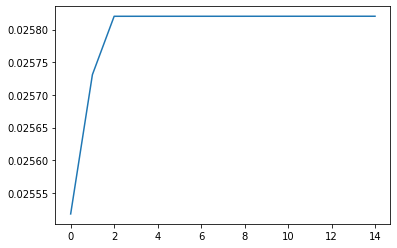

In [196]:
plt.plot(predictions_df_4_mortality)

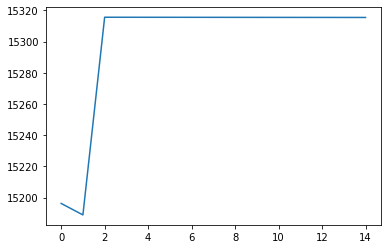

In [197]:
plt.plot(predictions_df_4_confirmedDeaths)

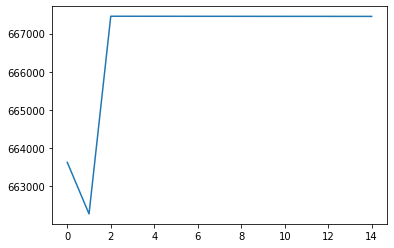

In [198]:
plt.plot(predictions_df_4_confirmedCases)

In [200]:
#actual vs forecast
df_4_mortality_model_arima_fit.plot.predict(
        start=1,
        end=60,
        dynamic=False,
)

AttributeError: 'ARIMAResults' object has no attribute 'plot'

In [ ]:
#visualize result trend

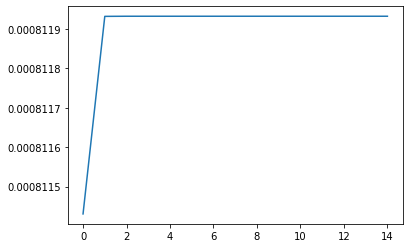

In [135]:
plt.plot(predictions_mortality)


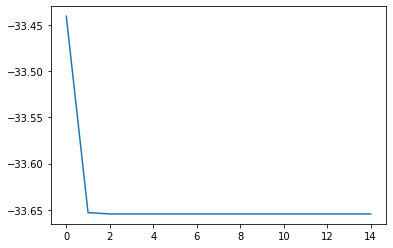

In [129]:
plt.plot(predictions_confirmedDeaths)

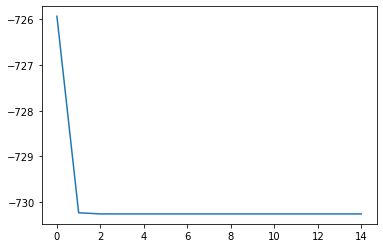

In [130]:
plt.plot(predictions_confirmedCases)

In [ ]:
#resume the result